## AVS Kaggle Competition

Links to Kaggle Comp Data: https://www.kaggle.com/c/acquire-valued-shoppers-challenge/data

#### Import Libraries

In [6]:
# basics imports

import os

import pandas as pd
import numpy as np


In [7]:
#S3
from boto.s3.connection import S3Connection
from IPython.parallel import Client

In [66]:
#plotting libraries and setting defaults

%matplotlib inline

import seaborn as sns
from seaborn import plt

# Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

### Launch EC2 instance

#### Load data
Ref 1: Lab '04 - Starcluster' 
Ref 2: Lab '17-ScalineOut' 

In [7]:
'''
#load access keys to variable

#credentials = pd.read_csv('/Users/eklypse/Downloads/credentials.csv')
#credentials = pd.read_csv('/Users/rychughes/.ssh/credentials.csv',skiprows=1,names=['a','b'])
credentials = pd.read_csv('/Users/rychughes/.ssh/credentials.csv',
                          #skiprows=1,
                          #names=['un','id','key']
                         )
'''

"\n#load access keys to variable\n\n#credentials = pd.read_csv('/Users/eklypse/Downloads/credentials.csv')\n#credentials = pd.read_csv('/Users/rychughes/.ssh/credentials.csv',skiprows=1,names=['a','b'])\ncredentials = pd.read_csv('/Users/rychughes/.ssh/credentials.csv',\n                          #skiprows=1,\n                          #names=['un','id','key']\n                         )\n"

In [9]:
credentials = pd.read_csv('/home/centos/certificates/credentials.csv')

In [10]:
aws_id = credentials['Access Key Id'][0]
#aws_id

In [11]:
aws_key = credentials['Secret Access Key'][0]
#aws_key

In [12]:
#load S3
s3conn = S3Connection( aws_id , aws_key )
#s3conn = S3Connection?

In [47]:
#s3conn.get_bucket?

In [13]:
bucket = s3conn.get_bucket('avs-kaggle-data')

#### Load 'offers_df'
This code works ==> this technique will work with new, larger datasets on powerful EC2 instance

In [14]:
offers_keys = bucket.get_all_keys(prefix='offers')
len( offers_keys)

1

In [15]:
offers_keys[0].get_contents_to_filename('offers.csv')

In [16]:
offers_df = pd.read_csv('offers.csv')
offers_df.head(3)

,offer,category,quantity,company,offervalue,brand
0,1190530,9115,1,108500080,5.00,93904
1,1194044,9909,1,107127979,1.00,6732
2,1197502,3203,1,106414464,0.75,13474


In [17]:
offers_df.shape

(37, 6)

#### Load 'train_hist_df'
This file is 6MB and timed out on laptop ==> need to launch in starcluster

In [18]:
train_hist_keys = bucket.get_all_keys(prefix='trainHistory')
len( train_hist_keys)

1

In [19]:
train_hist_keys[0].get_contents_to_filename('trainHistory.csv')

In [20]:
train_hist_df = pd.read_csv('trainHistory.csv')
train_hist_df.head(3)

,id,chain,offer,market,repeattrips,repeater,offerdate
0,86246,205,1208251,34,5,t,2013-04-24
1,86252,205,1197502,34,16,t,2013-03-27
2,12682470,18,1197502,11,0,f,2013-03-28


In [21]:
train_hist_df.shape

(160057, 7)

#### Load 'test_hist_df'

In [35]:
test_hist_keys = bucket.get_all_keys(prefix='testHistory')
len( test_hist_keys)

1

In [37]:
test_hist_keys[0].get_contents_to_filename('testHistory.csv')

In [38]:
test_hist_df = pd.read_csv('testHistory.csv')
test_hist_df.head(3)

,id,chain,offer,market,offerdate
0,12262064,95,1219903,39,2013-06-27
1,12277270,95,1221658,39,2013-06-23
2,12332190,95,1213242,39,2013-06-15


In [39]:
test_hist_df.shape

(151484, 5)

#### Load 'transactions_df'

In [24]:
trans_keys = bucket.get_all_keys(prefix='transactions.csv')
len( trans_keys)

1

In [25]:
trans_keys

[<Key: avs-kaggle-data,transactions.csv.gz>]

In [27]:
#note: this can take a few minutes
trans_keys[0].get_contents_to_filename('transactions.csv.gz')

In [28]:
trans_df = pd.read_csv('transactions.csv.gz', compression='gzip') 
trans_df.head(3)

#memory error, even with r3.2xlarge (60gb RAM)

MemoryError: 

In [ ]:
trans_df.shape

#### Load 'transactions_sample_df'
transactions_sample is a reduced set of customers (all transactions for each customer): <br/>
https://www.kaggle.com/c/acquire-valued-shoppers-challenge/forums/t/7659/sample-of-transaction-data/41783

In [29]:
trans_sample_keys = bucket.get_all_keys(prefix='transactions-sample')
len( trans_sample_keys)

1

In [30]:
trans_sample_keys[0].get_contents_to_filename('transactions-sample.csv')

In [31]:
trans_sample_df = pd.read_csv('transactions-sample.csv')
trans_sample_df.head(3)

,id,chain,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount
0,86246,205,7,707,1078778070,12564,2012-03-02,12,OZ,1,7.59
1,86246,205,63,6319,107654575,17876,2012-03-02,64,OZ,1,1.59
2,86246,205,97,9753,1022027929,0,2012-03-02,1,CT,1,5.99


In [32]:
trans_sample_df.shape

(27842, 11)

### Explore Datasets

#### Joining DF

#### Train DF

In [45]:
train_hist_df.shape

(160057, 7)

In [46]:
train_hist_df.head()

,id,chain,offer,market,repeattrips,repeater,offerdate
0,86246,205,1208251,34,5,t,2013-04-24
1,86252,205,1197502,34,16,t,2013-03-27
2,12682470,18,1197502,11,0,f,2013-03-28
3,12996040,15,1197502,9,0,f,2013-03-25
4,13089312,15,1204821,9,0,f,2013-04-01


In [47]:
train_hist_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160057 entries, 0 to 160056
Data columns (total 7 columns):
id             160057 non-null int64
chain          160057 non-null int64
offer          160057 non-null int64
market         160057 non-null int64
repeattrips    160057 non-null int64
repeater       160057 non-null object
offerdate      160057 non-null object
dtypes: int64(5), object(2)
memory usage: 9.8+ MB


In [48]:
train_hist_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,160057,1.869324e+09,1.570833e+09,86246,498182177,767486408,3285612741,4809911000
chain,160057,1.268103e+02,1.279343e+02,2,21,96,165,526
offer,160057,1.201984e+06,4.705531e+03,1194044,1197502,1200581,1208251,1208503
market,160057,1.995060e+01,1.909901e+01,1,10,14,24,96
repeattrips,160057,6.563349e-01,6.786516e+00,0,0,0,1,2124


In [91]:
len( pd.value_counts(train_hist_df['chain']))

130

In [92]:
len( pd.value_counts(train_hist_df['offer']))

24

In [93]:
len( pd.value_counts(train_hist_df['market']))

34

In [94]:
len( pd.value_counts(train_hist_df['repeattrips']))

56

#### Offers DF

In [33]:
offers_df.shape

(37, 6)

In [50]:
print offers_df

      offer  category  quantity     company  offervalue   brand
0   1190530      9115         1   108500080        5.00   93904
1   1194044      9909         1   107127979        1.00    6732
2   1197502      3203         1   106414464        0.75   13474
3   1198271      5558         1   107120272        1.50    5072
4   1198272      5558         1   107120272        1.50    5072
5   1198273      5558         1   107120272        1.50    5072
6   1198274      5558         1   107120272        1.50    5072
7   1198275      5558         1   107120272        1.50    5072
8   1199256      4401         1   105100050        2.00   13791
9   1199258      4401         1   105100050        2.00   13791
10  1200578      1703         1   104460040        1.50    7668
11  1200579      1703         1   104460040        1.50    7668
12  1200581      1726         1   104460040        1.25    7668
13  1200582      1726         1   104460040        1.25    7668
14  1200584      3504         1   104460

In [85]:
pd.value_counts(offers_df['offervalue'])
#majority of offers are between $1-2, with the vast majority being $1.50

1.50    19
2.00     6
1.00     5
1.25     3
3.00     2
5.00     1
0.75     1
dtype: int64

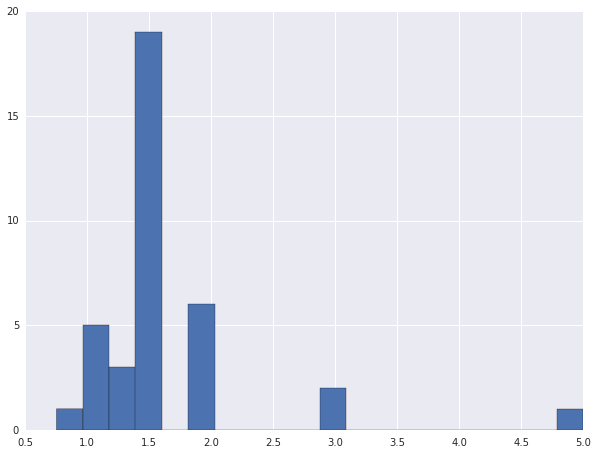

In [89]:
offers_df.offervalue.hist(bins=20)

In [73]:
pd.value_counts(offers_df['offervalue'])

1.50    19
2.00     6
1.00     5
1.25     3
3.00     2
5.00     1
0.75     1
dtype: int64

In [68]:
#offers_df.groupby(['category']).transform('count')
pd.value_counts(offers_df['category'])

5558    5
7205    5
1726    2
1703    2
2202    2
6202    2
4517    2
799     2
4401    2
5619    2
9909    2
5616    1
3504    1
9115    1
3509    1
706     1
2119    1
3203    1
5122    1
5824    1
dtype: int64

In [69]:
pd.value_counts(offers_df['company'])

104460040     7
103700030     5
107120272     5
107717272     2
105450050     2
1087744888    2
105100050     2
1076211171    2
1089520383    1
108079383     1
105190050     1
103320030     1
107106878     1
104127141     1
107127979     1
108500080     1
104610040     1
106414464     1
dtype: int64

In [72]:
pd.value_counts(offers_df['brand'])

4294      5
5072      5
7668      5
102504    2
13791     2
17286     2
1322      2
3718      2
64486     2
13474     1
28840     1
15889     1
93904     1
6926      1
26189     1
6732      1
17311     1
875       1
26456     1
dtype: int64

#### Transaction-Sample DF

In [34]:
trans_sample_df.shape

(27842, 11)

In [36]:
#no null values
trans_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27842 entries, 0 to 27841
Data columns (total 11 columns):
id                  27842 non-null int64
chain               27842 non-null int64
dept                27842 non-null int64
category            27842 non-null int64
company             27842 non-null int64
brand               27842 non-null int64
date                27842 non-null object
productsize         27842 non-null float64
productmeasure      27618 non-null object
purchasequantity    27842 non-null int64
purchaseamount      27842 non-null float64
dtypes: float64(2), int64(7), object(2)
memory usage: 2.5+ MB


In [49]:
#only a few customer ids
len( pd.value_counts(trans_sample_df['id']))

5

In [50]:
len( pd.value_counts(trans_sample_df['chain']))

2

In [51]:
len( pd.value_counts(trans_sample_df['dept']))

82

In [52]:
len( pd.value_counts(trans_sample_df['category']))

661

In [53]:
len( pd.value_counts(trans_sample_df['company']))

1355

In [54]:
len( pd.value_counts(trans_sample_df['brand']))

1805

In [55]:
len( pd.value_counts(trans_sample_df['productsize']))

653

In [57]:
len( pd.value_counts(trans_sample_df['purchasequantity']))

24

In [56]:
len( pd.value_counts(trans_sample_df['purchaseamount']))

1514

In [48]:
pd.DataFrame( trans_sample_df.groupby(['id','chain'])['purchasequantity','purchaseamount'].agg('sum') )

,,purchasequantity,purchaseamount
id,chain,,
86246,205,17333,52828.12
86252,205,17604,53592.90
12262064,95,1262,4118.18
12277270,95,1638,8085.44
12332190,95,891,3587.71


In [43]:
trans_sample_df.describe()

,id,chain,dept,category,company,brand,productsize,purchasequantity,purchaseamount
count,27842.000000,27842.000000,27842.000000,27842.000000,2.784200e+04,27842.000000,27842.000000,27842.000000,27842.000000
mean,1464518.304432,192.570577,40.320703,4046.298829,2.179135e+08,16964.997881,29.308435,1.390992,4.389496
std,3861686.310634,34.825128,26.391795,2643.541796,4.781015e+08,16189.953805,49.739271,1.087621,4.933723
min,86246.000000,95.000000,0.000000,0.000000,1.000000e+04,0.000000,0.000000,-1.000000,-9.680000
25%,86246.000000,205.000000,21.000000,2103.000000,1.027000e+08,6732.000000,7.000000,1.000000,1.980000
50%,86252.000000,205.000000,36.000000,3612.000000,1.041303e+08,13310.000000,14.750000,1.000000,3.190000
75%,86252.000000,205.000000,58.000000,5828.000000,1.072471e+08,19713.000000,26.500000,1.000000,4.990000
max,12332190.000000,205.000000,99.000000,9909.000000,1.097815e+10,108338.000000,960.000000,39.000000,164.900000


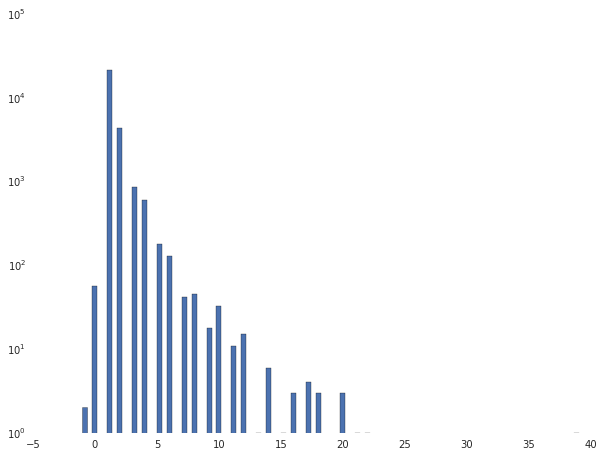

In [63]:
#trans_sample_df.purchasequantity.hist()
fig, ax = plt.subplots()
trans_sample_df.purchasequantity.hist( ax=ax, bins=100)
ax.set_yscale('log')

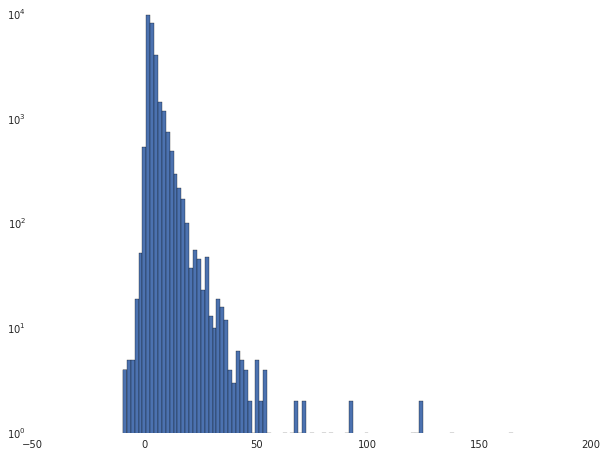

In [73]:
#trans_sample_df.purchaseamount.hist()
fig, ax = plt.subplots()
fig = trans_sample_df.purchaseamount.hist( ax=ax, bins=100)
#sns.kdeplot( trans_sample_df.purchaseamount)
ax.set_yscale('log')

#### Join datasets (still using trans_sample_df)

The transactions file can be joined to the history file by (id,chain). 

The history file can be joined to the offers file by (offer). 

The transactions file can be joined to the offers file by (category, brand, company). 

In [74]:
import sqlite3

In [ ]:
trans_sample_df_2 = pd.read_sql( 
                                    , conn, "mid" )
trans_sample_df_2 